In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from functions import *

# Import Data

In [2]:
df = pd.read_csv("./OC_csv/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Data

### Nulls in Age have been imputed with the mean age

In [4]:
age_mean = df["Age"].mean()
df["Age"] = df["Age"].fillna(value=age_mean)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df_clean = pd.read_csv("./OC_csv/titanic_clean.csv")
df_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Embarked_nan,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


### The first letter of the cabin has been split to provide a new deck feature.  This has then been one-hot encoded, with nulls going to a column Deck_nan

In [6]:
df["Deck"] = df["Cabin"].str[0].fillna("nan")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,nan
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,nan
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,nan


In [7]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohe_transform = ohe.fit_transform(df[["Deck"]])

In [8]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [9]:
df.drop(["Cabin","Deck"], axis=1, inplace=True)
df = pd.concat([df, ohe_transform], axis= 1)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Sex one-hot encoding

In [11]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
ohe_transform = ohe.fit_transform(df[["Sex"]])
ohe_transform

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


### Embarked one-hot encoding, with nulls going to a column Embarked_nan

In [12]:
df.drop("Sex",axis=1, inplace=True)
df = pd.concat([df, ohe_transform], axis=1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Deck_A         0
Deck_B         0
Deck_C         0
Deck_D         0
Deck_E         0
Deck_F         0
Deck_G         0
Deck_T         0
Deck_nan       0
Sex_female     0
Sex_male       0
dtype: int64

In [13]:
df["Embarked"] = df["Embarked"].fillna("nan")
ohe = OneHotEncoder(sparse_output=False).set_output(transform= "pandas")
ohe_transform = ohe.fit_transform(df[["Embarked"]])
df = df.drop("Embarked",axis=1)

In [14]:
df = pd.concat([df, ohe_transform], axis=1)

### Dropping Name and Ticket

In [15]:
df = df.drop(["Name","Ticket"], axis=1)

In [16]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Deck_A          float64
Deck_B          float64
Deck_C          float64
Deck_D          float64
Deck_E          float64
Deck_F          float64
Deck_G          float64
Deck_T          float64
Deck_nan        float64
Sex_female      float64
Sex_male        float64
Embarked_C      float64
Embarked_Q      float64
Embarked_S      float64
Embarked_nan    float64
dtype: object

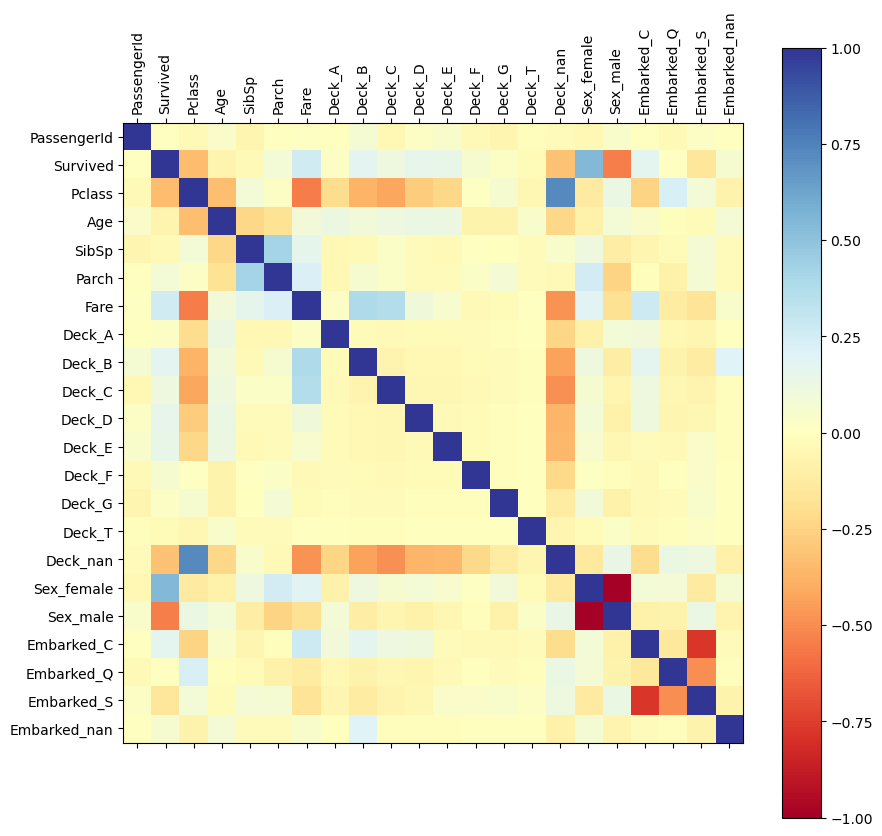

In [17]:
correlationMatrix(df)

# Prepare Data

## Splitting Dataset

In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype='object')

In [19]:
y = df["Survived"]
X = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_nan', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_nan']]

# Scaling features

In [20]:
scaler = MinMaxScaler()
rescaled_X = scaler.fit_transform(X)
X = pd.DataFrame(rescaled_X, columns=X.columns)
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Deck_A,Deck_B,Deck_C,Deck_D,...,Deck_F,Deck_G,Deck_T,Deck_nan,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.654321,0.367921,0.065376,0.063599,0.062858,0.016835,0.052750,0.066218,0.037037,...,0.014590,0.004489,0.001122,0.771044,0.352413,0.647587,0.188552,0.086420,0.722783,0.002245
std,0.289162,0.418036,0.163383,0.137843,0.134343,0.096995,0.128725,0.223659,0.248802,0.188959,...,0.119973,0.066890,0.033501,0.420397,0.477990,0.477990,0.391372,0.281141,0.447876,0.047351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.271174,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.750000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Model

### Splitting the Train and test

In [21]:
test_size = 0.33
seed = 1
X_train,X_test, Y_train, Y_test = train_test_split(X, y , test_size=test_size, random_state=seed)

### Creating multiple models, fitting them and checking them

In [22]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

LogisticRegression()

### Checking models

In [24]:
predictions_dt = model_dt.predict(X_train)
print("DecisionTreeClassifier", accuracy_score(Y_train,predictions_dt))

DecisionTreeClassifier 1.0


In [25]:
predictions_lr = model_lr.predict(X_train)
print("LogisticRegression", accuracy_score(Y_train,predictions_lr))

LogisticRegression 0.8204697986577181


### Evaluating model

In [26]:
predictions_dt = model_dt.predict(X_test)
print("DecisionTreeClassifier :", accuracy_score(Y_test, predictions_dt))

DecisionTreeClassifier : 0.7389830508474576


In [27]:
predictions_lr =model_lr.predict(X_test)
print("Logistic Regression : ", accuracy_score(Y_test, predictions_lr))

Logistic Regression :  0.7593220338983051


#### => Our final model is the Logistic Regression

# Inspecting model

In [28]:
X = X.sort_index(axis=1)

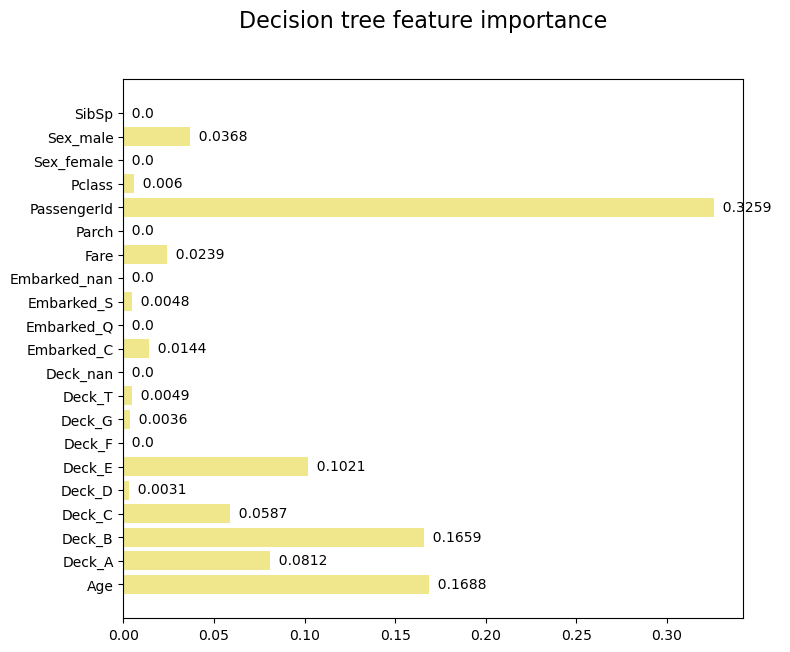

In [29]:
decisionTreeSummary(model_dt, X.columns)

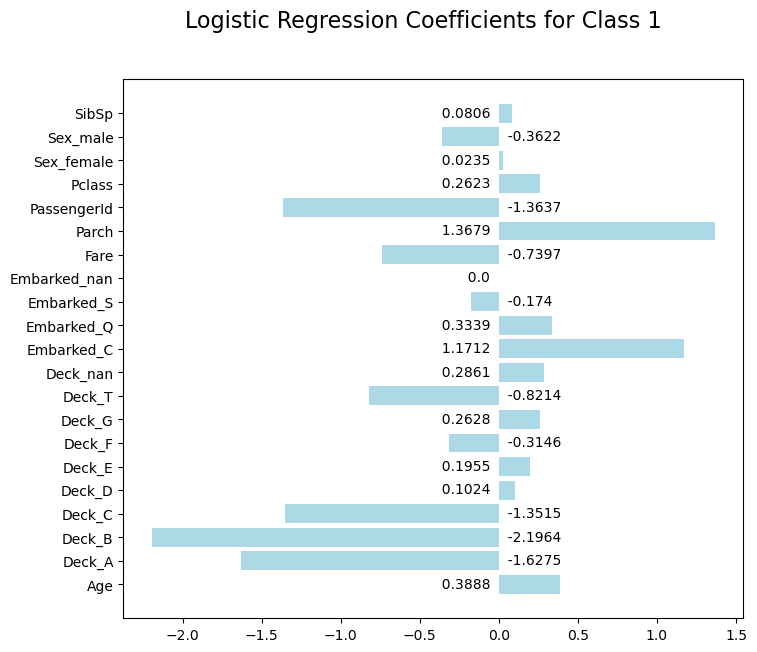

In [30]:
logisticRegressionSummary(model_lr, X.columns)